# Titanic Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('titanic_train.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


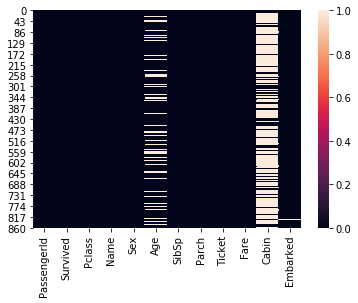

In [8]:
sns.heatmap(df.isnull())

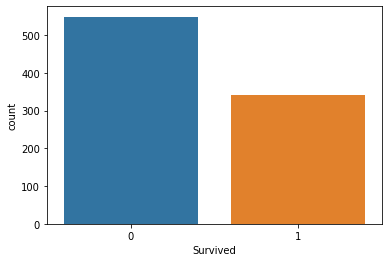

In [9]:
sns.countplot(x = 'Survived' , data = df)

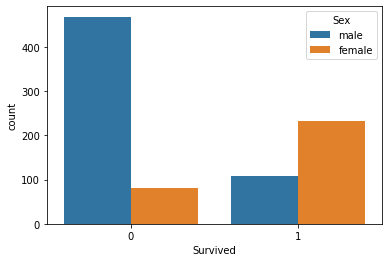

In [10]:
sns.countplot(x = 'Survived' , hue = 'Sex' , data = df)

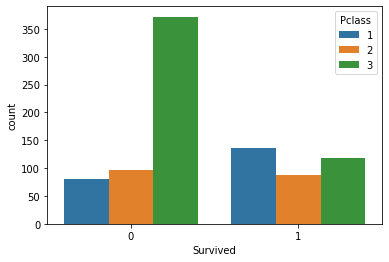

In [11]:
sns.countplot(x = 'Survived' , hue = 'Pclass' , data = df)

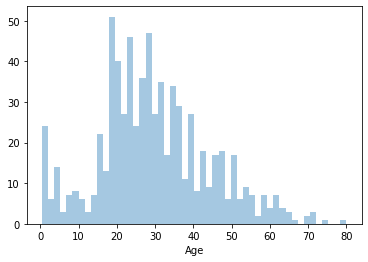

In [12]:
sns.distplot(df['Age'].dropna(), kde = False , bins = 50)

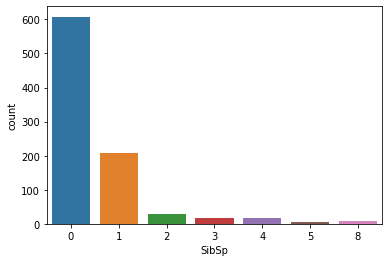

In [13]:
sns.countplot('SibSp' , data = df)

# Data Cleaning

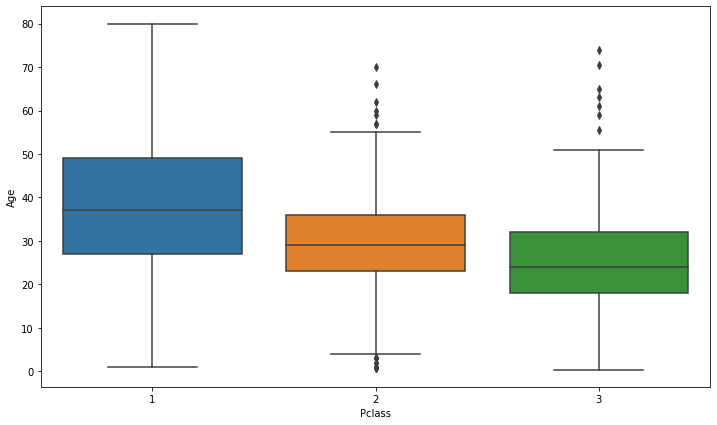

In [16]:
plt.figure(figsize = (12,7))
sns.boxplot(x = 'Pclass' , y = 'Age' , data = df)

In [17]:
def impute_age(cols) :
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age) :
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else :
        return Age

In [18]:
df['Age'] = df[['Age' , 'Pclass']].apply(impute_age , axis = 1)

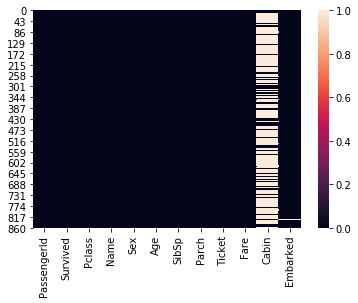

In [20]:
sns.heatmap(df.isnull())

In [21]:
df.drop('Cabin' , axis = 1 , inplace = True)

In [24]:
df.drop(['Name' , 'Ticket' , 'PassengerId'] , axis = 1, inplace = True)

In [25]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


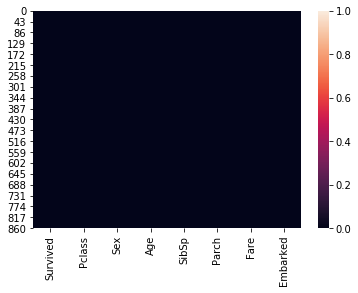

In [26]:
sns.heatmap(df.isnull())

I have done drop_first because male and female are correlate if male =1 then female is automatically 0 so it is better to drop 1 of them

In [34]:
sex = pd.get_dummies(df['Sex'] , drop_first = True )

Droped C because C and S are correlate with each other

In [35]:
embarked = pd.get_dummies(df['Embarked'] , drop_first = True)

In [36]:
pd.concat([df , sex , embarked] , axis = 1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,3,male,22.0,1,0,7.2500,S,1,0,1
1,1,1,female,38.0,1,0,71.2833,C,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,1,0,1
887,1,1,female,19.0,0,0,30.0000,S,0,0,1
888,0,3,female,24.0,1,2,23.4500,S,0,0,1
889,1,1,male,26.0,0,0,30.0000,C,1,0,0


In [38]:
df.drop(['Sex' , 'Embarked'] ,axis =1, inplace = True)

In [39]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [45]:
df.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

# Machine Learning Algorithm

In [42]:
from sklearn.model_selection import train_test_split

In [46]:
X = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
Y = df['Survived']

In [70]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=101)

In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
lR = LogisticRegression()

In [73]:
lR.fit(X_train,Y_train)

c:\users\pragyat\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [74]:
predictions = lR.predict(X_test)

# Evaluation

In [75]:
from sklearn.metrics import classification_report

In [76]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.67      0.89      0.77       154
           1       0.73      0.41      0.53       114

    accuracy                           0.69       268
   macro avg       0.70      0.65      0.65       268
weighted avg       0.70      0.69      0.66       268

